In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
import numpy as np
import os

In [2]:
os.chdir(r'C:\Users\user\Downloads')
df = pd.read_csv('NFLX.csv')

In [3]:
df.shape

(1009, 7)

In [4]:
df.head


<bound method NDFrame.head of             Date        Open        High         Low       Close   Adj Close  \
0     2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1     2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2     2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3     2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4     2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
...          ...         ...         ...         ...         ...         ...   
1004  2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005  2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006  2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007  2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

        V

In [5]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [6]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


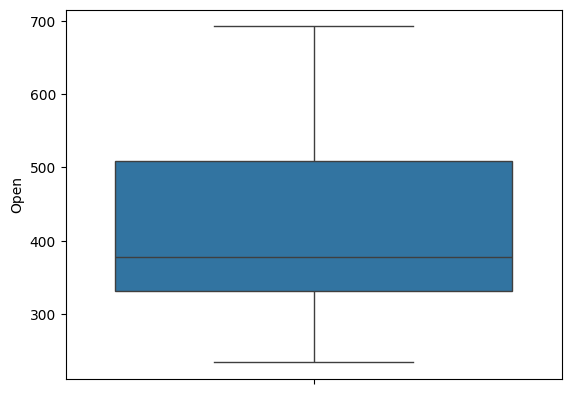

In [9]:
sns.boxplot(df['Open']);

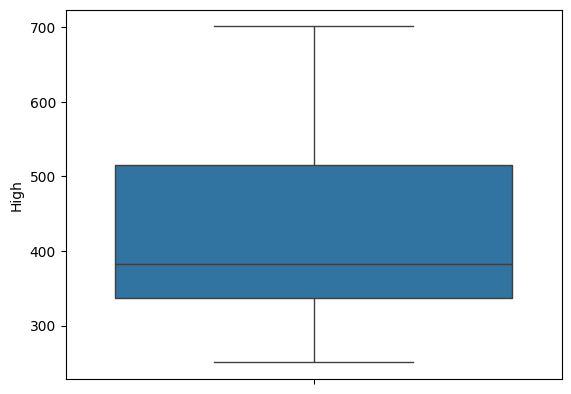

In [10]:
sns.boxplot(df['High']);

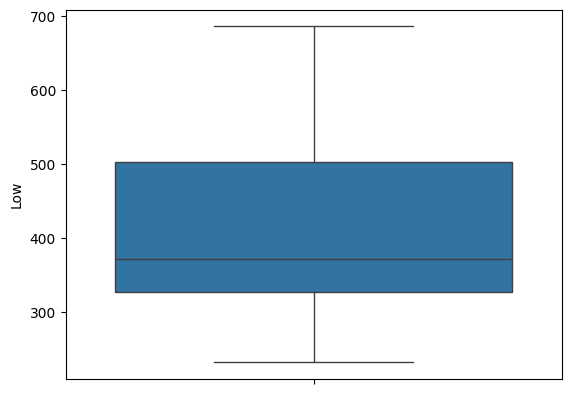

In [11]:
sns.boxplot(df['Low']);

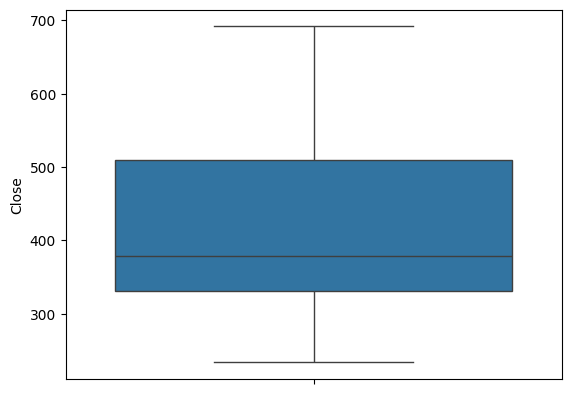

In [12]:
sns.boxplot(df['Close']);

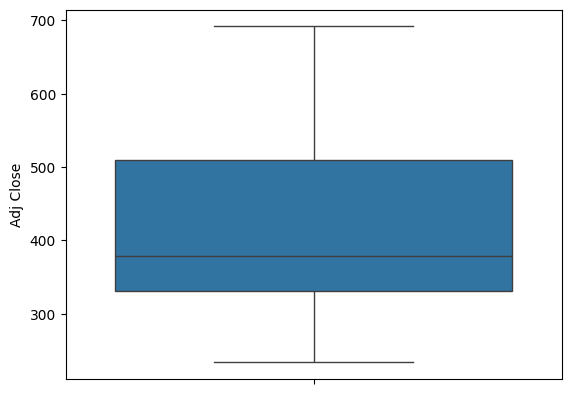

In [13]:
sns.boxplot(df['Adj Close']);

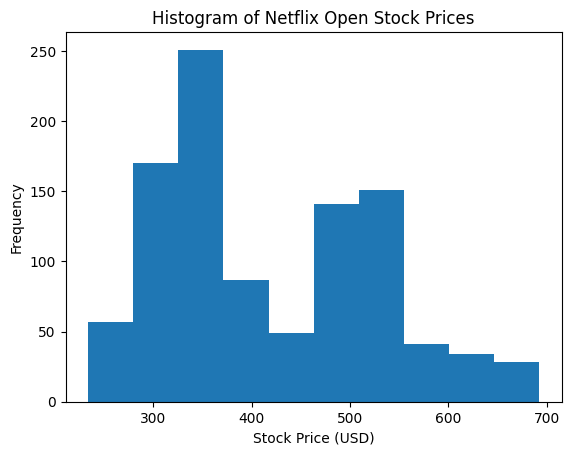

In [14]:
df['Open'].plot.hist()
plt.title('Histogram of Netflix Open Stock Prices')
plt.xlabel('Stock Price (USD)')
plt.ylabel('Frequency')
plt.show()

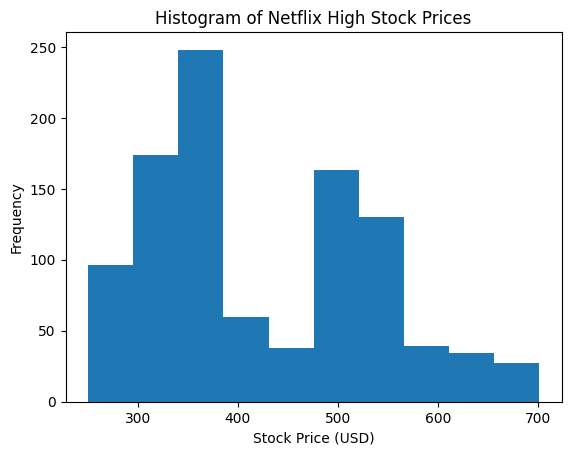

In [15]:
df['High'].plot.hist()
plt.title('Histogram of Netflix High Stock Prices')
plt.xlabel('Stock Price (USD)')
plt.ylabel('Frequency')
plt.show()

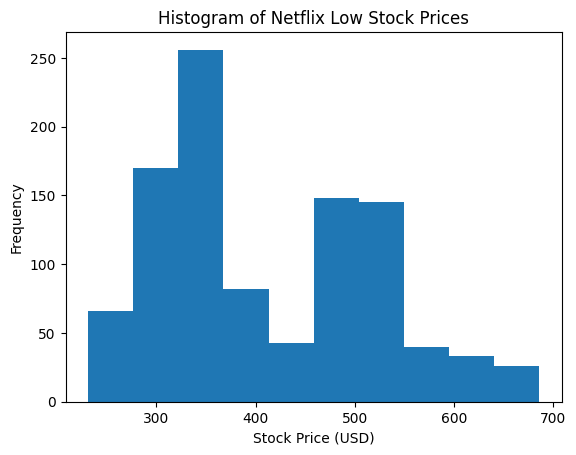

In [16]:
df['Low'].plot.hist()
plt.title('Histogram of Netflix Low Stock Prices')
plt.xlabel('Stock Price (USD)')
plt.ylabel('Frequency')
plt.show()

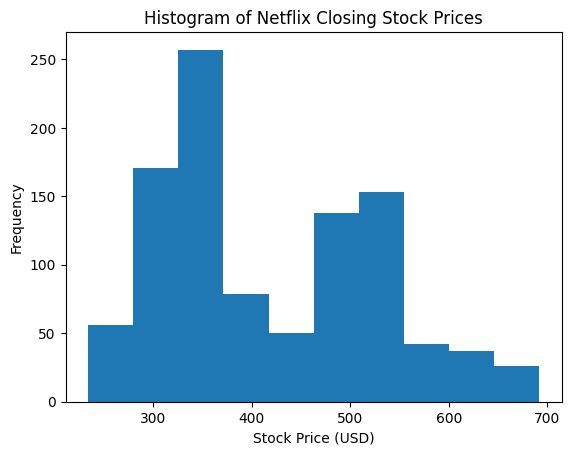

In [17]:
df['Close'].plot.hist()
plt.title('Histogram of Netflix Closing Stock Prices')
plt.xlabel('Stock Price (USD)')
plt.ylabel('Frequency')
plt.show()

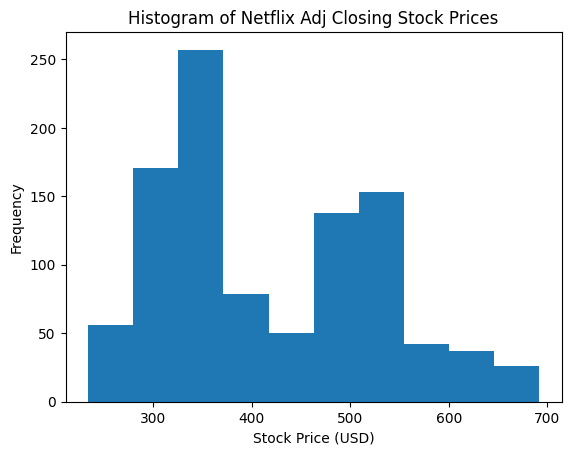

In [18]:
df['Adj Close'].plot.hist()
plt.title('Histogram of Netflix Adj Closing Stock Prices')
plt.xlabel('Stock Price (USD)')
plt.ylabel('Frequency')
plt.show()

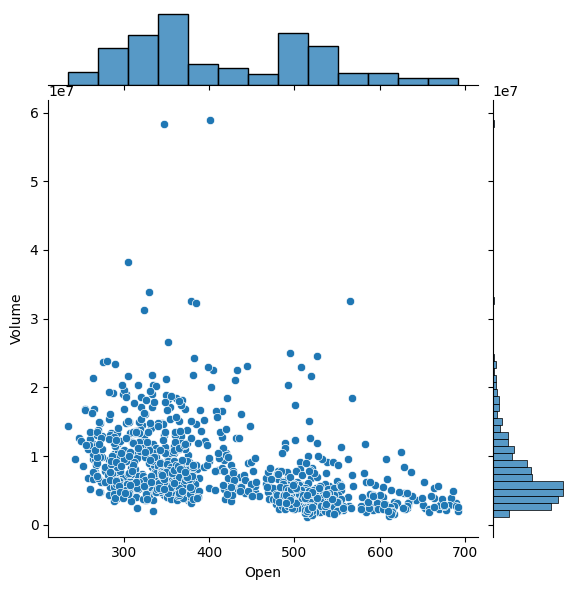

In [19]:
sns.jointplot(data=df,x='Open',y='Volume')

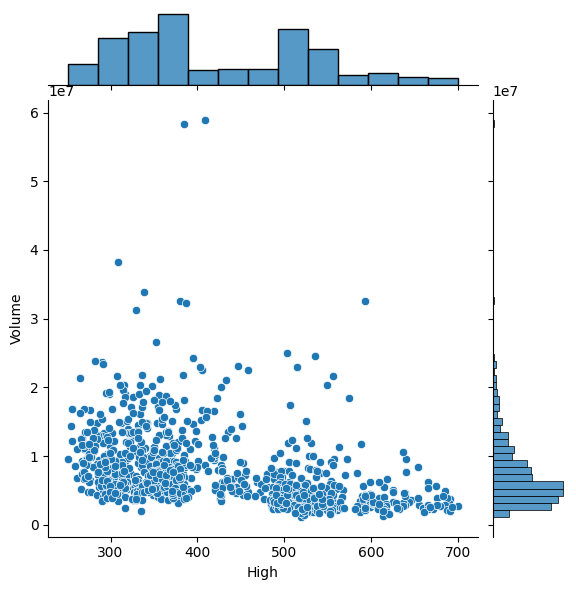

In [20]:
sns.jointplot(data=df,x='High',y='Volume')

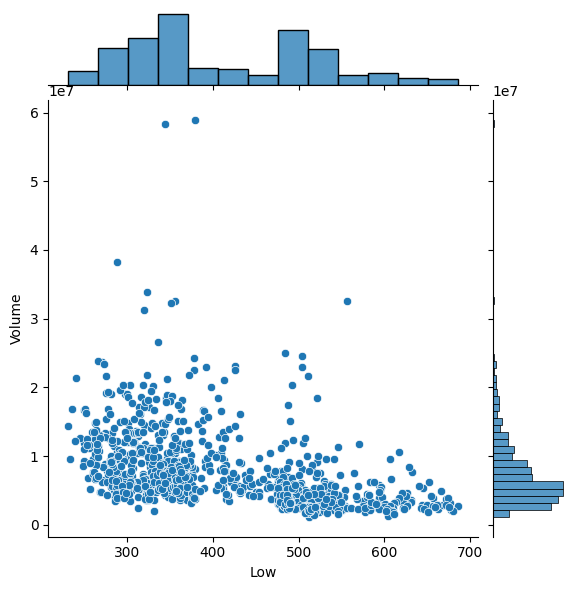

In [21]:
sns.jointplot(data=df,x='Low',y='Volume')

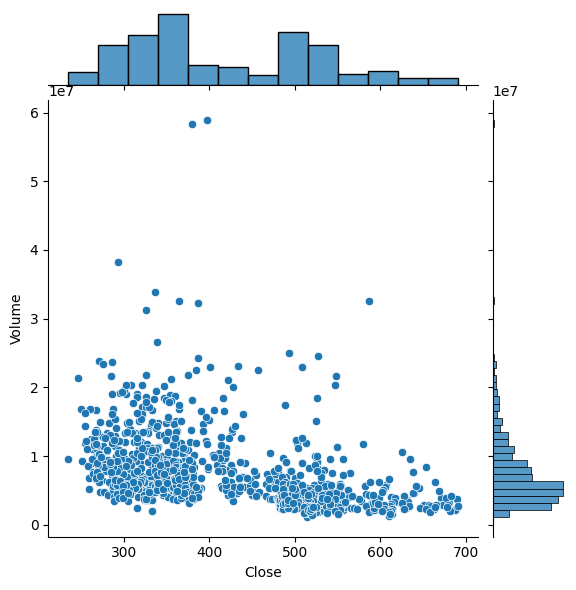

In [22]:
sns.jointplot(data=df,x='Close',y='Volume')

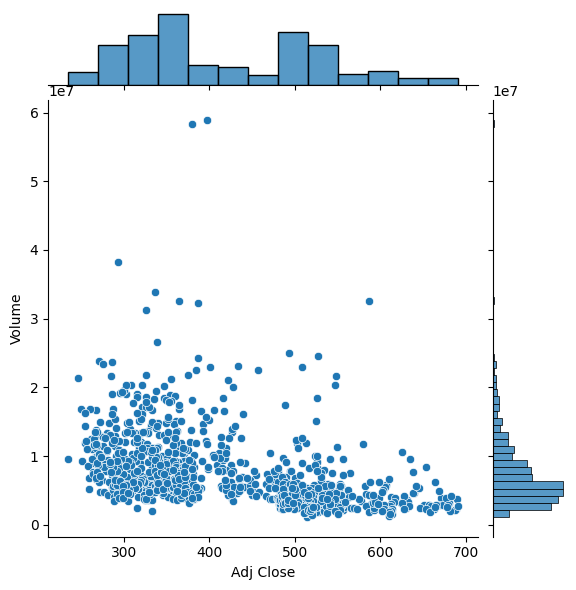

In [23]:
sns.jointplot(data=df,x='Adj Close',y='Volume')

In [24]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [25]:
from sklearn import preprocessing
import pandas as pd

df = pd.read_csv('NFLX.csv')

X = df.drop(columns=['Volume'])
y = df['Volume']

X['Date'] = pd.to_datetime(X['Date'])
X['Date'] = X['Date'].apply(lambda x: x.timestamp())

scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[0.00000000e+00 6.12525431e-02 3.83043926e-02 4.13314025e-02
  4.45162625e-02 4.45162625e-02]
 [6.84931507e-04 3.00591141e-02 3.56397792e-02 3.02730578e-02
  6.95484944e-02 6.95484944e-02]
 [1.36986301e-03 7.12431354e-02 4.84079100e-02 7.27696187e-02
  6.70146856e-02 6.70146856e-02]
 ...
 [9.98630137e-01 4.67530511e-01 4.47062261e-01 4.29252961e-01
  4.27251496e-01 4.27251496e-01]
 [9.99315068e-01 4.09048302e-01 3.96611488e-01 3.80446712e-01
  3.75090108e-01 3.75090108e-01]
 [1.00000000e+00 3.78225701e-01 3.59994663e-01 3.63650371e-01
  3.85072430e-01 3.85072430e-01]]


In [26]:
X.head()

,Date,Open,High,Low,Close,Adj Close
0,1.517789e+09,262.000000,267.899994,250.029999,254.259995,254.259995
1,1.517875e+09,247.699997,266.700012,245.000000,265.720001,265.720001
2,1.517962e+09,266.579987,272.450012,264.329987,264.559998,264.559998
3,1.518048e+09,267.079987,267.619995,250.000000,250.100006,250.100006
4,1.518134e+09,253.850006,255.800003,236.110001,249.470001,249.470001


In [27]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size = 0.2 ,random_state=42)

In [28]:
X_train.shape, X_test.shape

((807, 6), (202, 6))

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
pred=model.predict(X_test)

In [31]:
y_test[:5]

628     5608000
631     5910300
741     4177400
514     3930100
365    16302500
Name: Volume, dtype: int64

In [32]:
pred[:5]

array([5406032.85532719, 9553802.10367106, 4912536.17439809,
       6151107.68773128, 8682986.07302105])

In [33]:
print("MSE",round(mean_squared_error(y_test,pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,pred)), 3))
print("MAE",round(mean_absolute_error(y_test,pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,pred), 3))
print("R2 Score : ", round(r2_score(y_test,pred), 3))

MSE 15369357198455.145
RMSE 3920377.176
MAE 2533757.587
MAPE 0.356
R2 Score :  0.384


In [34]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    
    ax.tick_params(axis='y', colors='white')    

    ax.spines['left'].set_color('white')        
   
    ax.spines['bottom'].set_color('white')      

    ax.set_facecolor("black")

In [35]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [36]:
data = pd.DataFrame(df[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


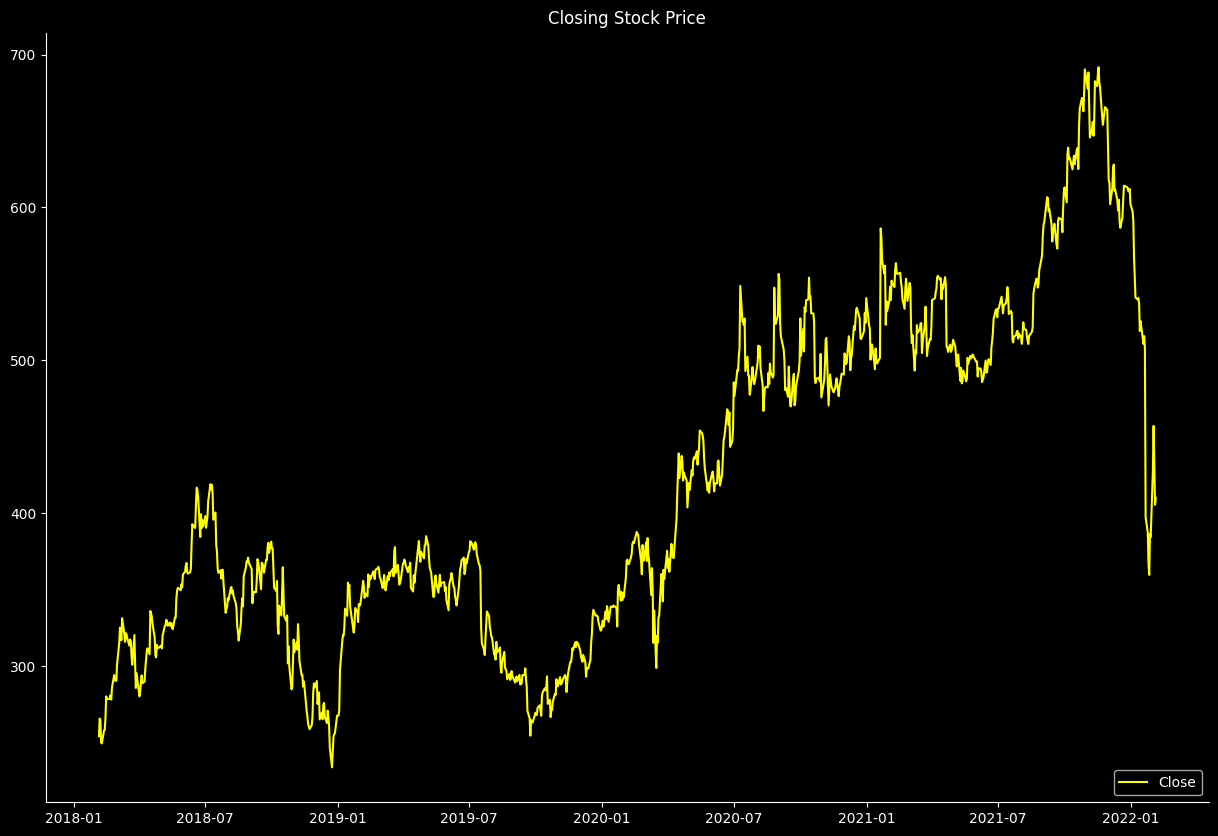

In [37]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(df.Date, df.Close, color="yellow")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

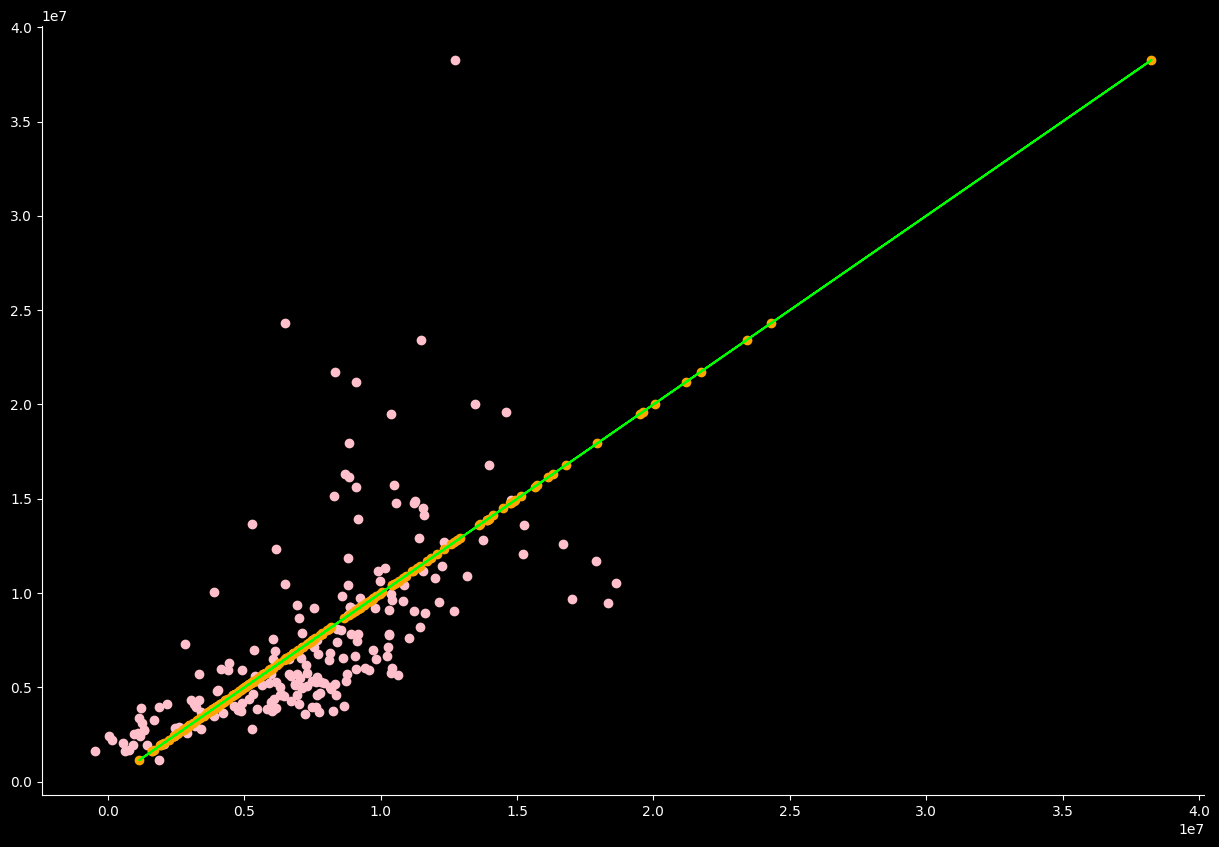

In [38]:
style()

plt.scatter(pred, y_test, color='pink', marker='o')
plt.scatter(y_test, y_test, color='orange')
plt.plot(y_test, y_test, color='lime')

In [39]:
X_test['Close_Prediction'] = pred
X_test

,Date,Open,High,Low,Close,Adj Close,Close_Prediction
628,1.596499e+09,498.649994,510.440002,498.649994,509.640015,509.640015,5.406033e+06
631,1.596758e+09,505.450012,508.290009,486.679993,494.730011,494.730011,9.553802e+06
741,1.610582e+09,507.350006,514.500000,499.579987,500.859985,500.859985,4.912536e+06
514,1.582243e+09,385.329987,387.320007,377.899994,380.070007,380.070007,6.151108e+06
365,1.563494e+09,323.399994,325.850006,314.230011,315.100006,315.100006,8.682986e+06
...,...,...,...,...,...,...,...
780,1.615507e+09,512.500000,526.510010,506.589996,518.020020,518.020020,7.622366e+06
334,1.559693e+09,354.380005,357.880005,348.709991,355.730011,355.730011,8.134907e+06
210,1.543882e+09,288.130005,295.739990,274.720001,275.329987,275.329987,1.376171e+07
350,1.561594e+09,363.200012,370.850006,363.200012,370.019989,370.019989,7.011516e+06


In [40]:
X_test[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,4.163044e+02,1.082500e+02,260.579987,3.317550e+02,3.702700e+02,5.086175e+02,6.916900e+02
Close_Prediction,202.0,7.473711e+06,3.770953e+06,-493036.011329,5.285318e+06,7.549346e+06,9.772246e+06,1.861561e+07


In [46]:
X_test['Date'] = pd.to_datetime(X_test['Date'], unit='s')

In [47]:
output = pd.DataFrame(X_test[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop('index',axis=1)
output.set_index('Date', inplace=True)
output =  output.asfreq('D')
output

,Close,Close_Prediction
Date,,
2018-02-20,278.549988,1.030435e+07
2018-02-21,NaN,NaN
2018-02-22,NaN,NaN
2018-02-23,NaN,NaN
2018-02-24,NaN,NaN
...,...,...
2022-01-27,386.700012,6.493181e+06
2022-01-28,NaN,NaN
2022-01-29,NaN,NaN


In [48]:
output.to_csv('Close_Prediction.csv', index=True)
print("CSV successfully saved!")

CSV successfully saved!
